# Amazon Top 50 Books Bestsellers for the Period 2009-2019
<img src='https://img.huffingtonpost.com/asset/563814a51800002b00303a59.png?cache=8jlhc7dj9k&ops=1910_1000' title='Amazon Top 50 Books Bestsellers for the Period 2009-2019'/>  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
%precision %.2f

'%.2f'

# CONTENT
- [Reading the Dataset](#Reading-the-Dataset-using-Pandas-Library)
- [Importing Visualization Libraries](#Importing-Visualization-Libraries)
- [Data Visualization and Analysis](#Data-Visualization-and-Analysis)
- [The End](#The-End)

# Reading the Dataset using Pandas Library

In [3]:
df = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
print(df.describe(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  201

### Splitting the data into Respective Years

In [5]:
df_2009 = df[df['Year'] == 2009]
df_2010 = df[df['Year'] == 2010]
df_2011 = df[df['Year'] == 2011]
df_2012 = df[df['Year'] == 2012]
df_2013 = df[df['Year'] == 2013]
df_2014 = df[df['Year'] == 2014]
df_2015 = df[df['Year'] == 2015]
df_2016 = df[df['Year'] == 2016]
df_2017 = df[df['Year'] == 2017]
df_2018 = df[df['Year'] == 2018]
df_2019 = df[df['Year'] == 2019]

### Creating a dataframe with Duplicates removed from original dataframe

In [6]:
df_without_duplicates = df.drop_duplicates(subset='Name',keep='first')

# Importing Visualization Libraries

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### Encoding the Categorical Varible : Genre in both the dataframes

In [8]:
#Non-Fiction == 1 and Fiction === 0
df['Genre'] = pd.get_dummies(df['Genre'],drop_first=True)
df_without_duplicates['Genre'] = pd.get_dummies(df_without_duplicates['Genre'],drop_first=True)

# Data Visualization and Analysis

### Plotting 2 Graphs to visualize the Genre Count in Data
- Graph 1 : Genre classes count with duplicates
- Graph 2 : Genre classes count without duplicates
#### We can infer from this that Non-Fiction Books are more popular than Fiction in the Top 50 Bestsellers

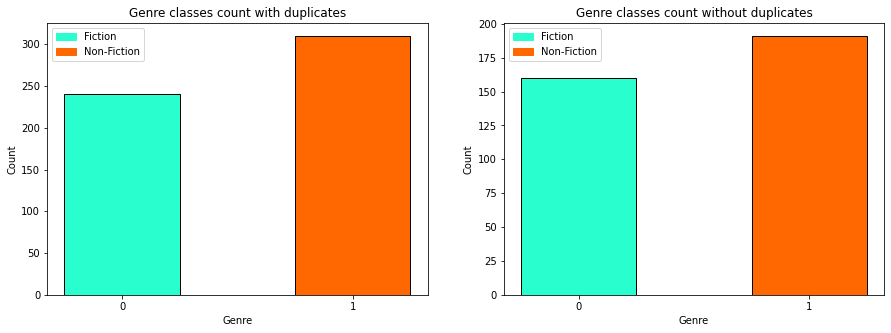

In [9]:
from matplotlib.patches import Rectangle

plt.figure(figsize=(15,5))
#plot1
plt.subplot(1,2,1)
N,bins,patches = plt.hist(df['Genre'],bins=np.arange(0,3,1)-0.5,edgecolor='black',rwidth=0.5)
cmap = plt.get_cmap('jet')
fiction = cmap(0.4)
nonfiction = cmap(0.8)
patches[0].set_facecolor(fiction)
patches[1].set_facecolor(nonfiction)

plt.xticks([0,1])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre classes count with duplicates')


handles = [Rectangle((0,0),1,1,color=c) for c in [fiction,nonfiction]]
labels = ['Fiction','Non-Fiction']
plt.legend(handles,labels)

#plot2
plt.subplot(1,2,2)
N,bins,patches = plt.hist(df_without_duplicates['Genre'],bins=np.arange(0,3,1)-0.5,edgecolor='black',rwidth=0.5)
cmap = plt.get_cmap('jet')
fiction = cmap(0.4)
nonfiction = cmap(0.8)
patches[0].set_facecolor(fiction)
patches[1].set_facecolor(nonfiction)

plt.xticks([0,1])
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre classes count without duplicates')

handles = [Rectangle((0,0),1,1,color=c) for c in [fiction,nonfiction]]
labels = ['Fiction','Non-Fiction']
plt.legend(handles,labels)

### Plotting the Frequency of User Ratings for individual year
- `Having a User Rating between 4.6 to 4.8 is the general trend over the years.`
- `Years 2012-2015 had 1 book each with User Rating below 4.`
- `For the years 2018 and 2019 the majority User Rating was 4.8 which indicates that people preferred buying highly rated books.`

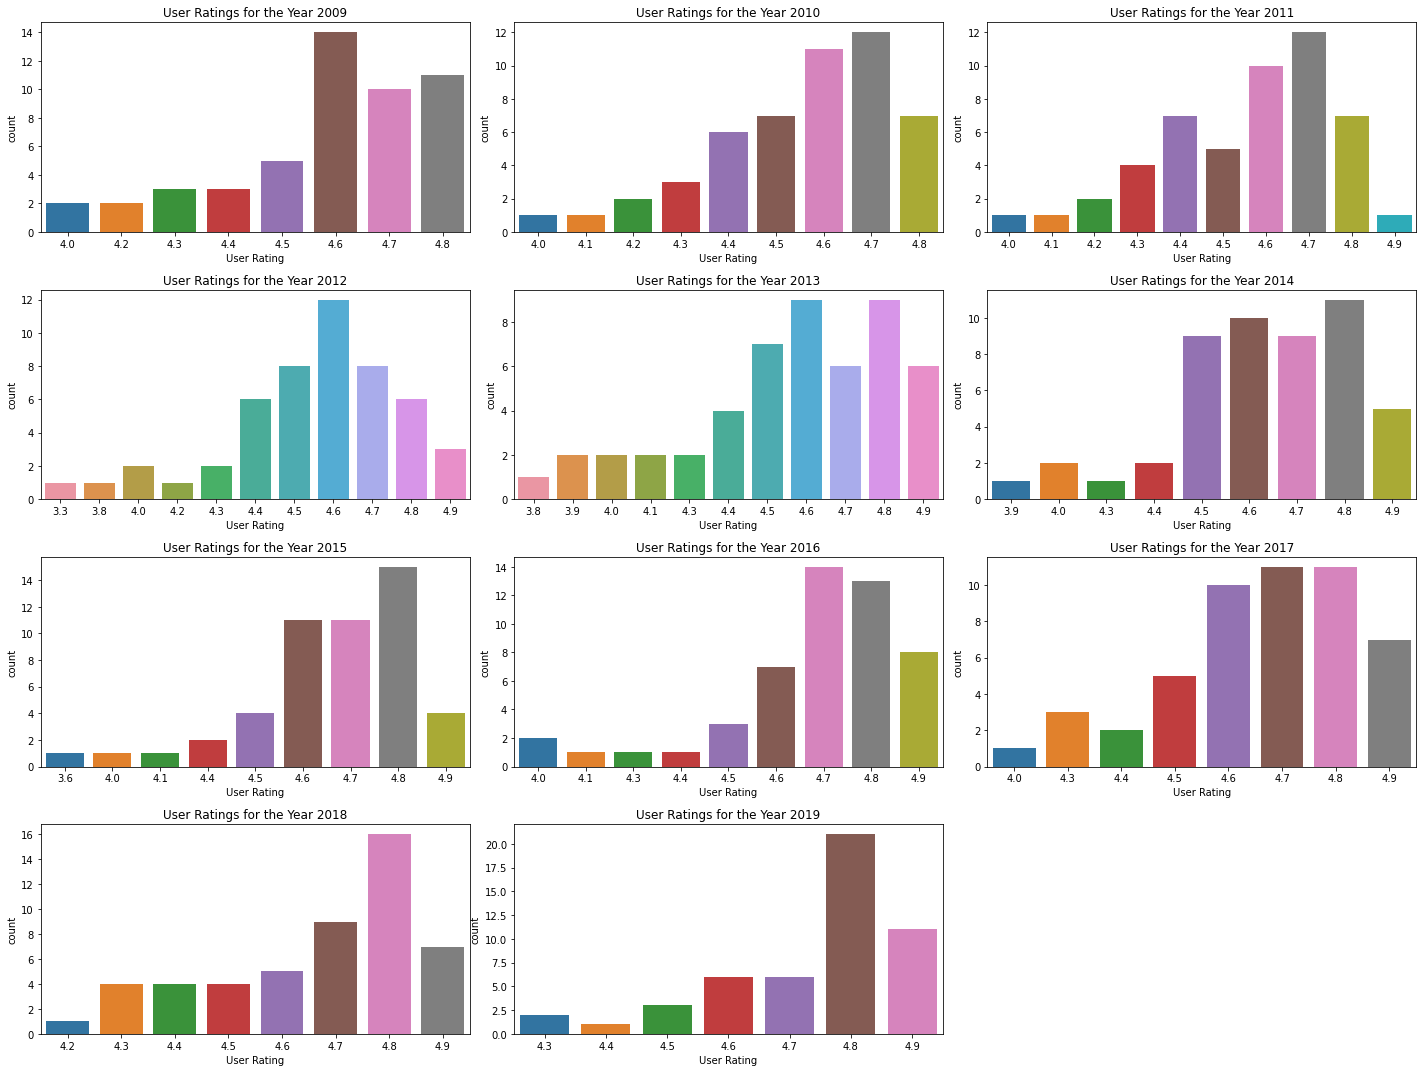

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))

graphs = sns.countplot(ax=axes[0,0],x='User Rating',data=df_2009)
axes[0,0].set_title('User Ratings for the Year 2009')
graphs = sns.countplot(ax=axes[0,1],x='User Rating',data=df_2010)
axes[0,1].set_title('User Ratings for the Year 2010')
graphs = sns.countplot(ax=axes[0,2],x='User Rating',data=df_2011)
axes[0,2].set_title('User Ratings for the Year 2011')
graphs = sns.countplot(ax=axes[1,0],x='User Rating',data=df_2012)
axes[1,0].set_title('User Ratings for the Year 2012')
graphs = sns.countplot(ax=axes[1,1],x='User Rating',data=df_2013)
axes[1,1].set_title('User Ratings for the Year 2013')
graphs = sns.countplot(ax=axes[1,2],x='User Rating',data=df_2014)
axes[1,2].set_title('User Ratings for the Year 2014')
graphs = sns.countplot(ax=axes[2,0],x='User Rating',data=df_2015)
axes[2,0].set_title('User Ratings for the Year 2015')
graphs = sns.countplot(ax=axes[2,1],x='User Rating',data=df_2016)
axes[2,1].set_title('User Ratings for the Year 2016')
graphs = sns.countplot(ax=axes[2,2],x='User Rating',data=df_2017)
axes[2,2].set_title('User Ratings for the Year 2017')
graphs = sns.countplot(ax=axes[3,0],x='User Rating',data=df_2018)
axes[3,0].set_title('User Ratings for the Year 2018')
graphs = sns.countplot(ax=axes[3,1],x='User Rating',data=df_2019)
axes[3,1].set_title('User Ratings for the Year 2019')
fig.delaxes(axes[3,2])
fig.tight_layout()

### Plotting the Density Graph for Price in accordance to User Rating
- `By taking a look at the graphs we can understand that majority bestsellers were in the price range of 5 to 30 and between 4.6 and 4.8 User Rating.`

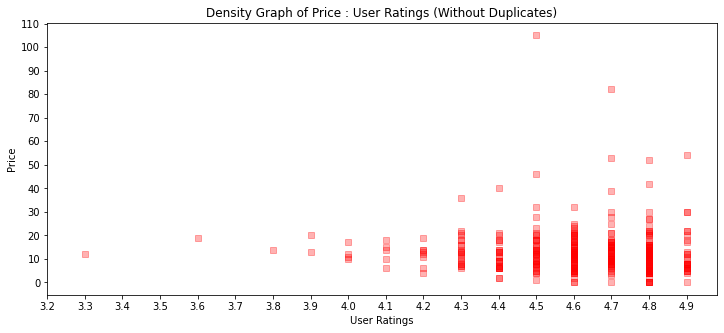

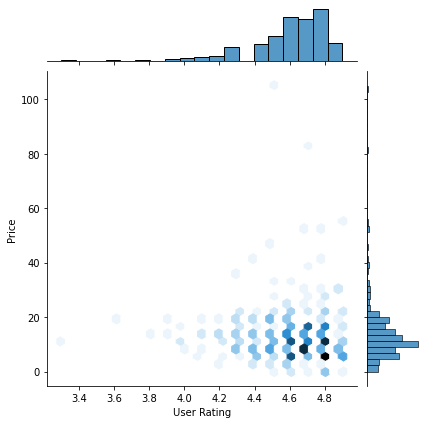

In [11]:
plt.figure(figsize=(12,5))
plt.scatter(df_without_duplicates['User Rating'],df_without_duplicates['Price'],color='red',marker='s',alpha=0.3)
plt.xlabel('User Ratings')
plt.xticks(np.arange(3.2,5,0.1))
plt.ylabel('Price')
plt.yticks(np.arange(0,120,10))
plt.title('Density Graph of Price : User Ratings (Without Duplicates)')

sns.jointplot(x='User Rating',y='Price',data=df_without_duplicates,kind='hex')

### Plotting the Density Graph for Reviews in accordance to User Rating
- `From this graph the majority bestsellers have reviews in the range of 0 to 20k and User Rating between 4.5 and 4.8`

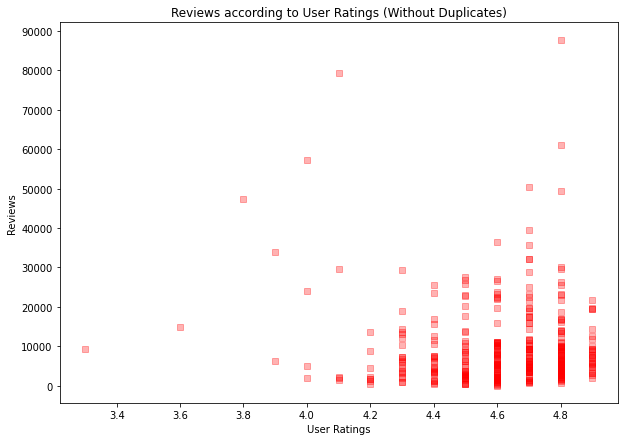

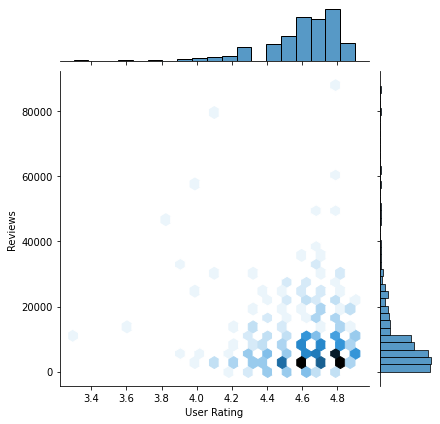

In [12]:
plt.figure(figsize=(10,7))
plt.scatter(df_without_duplicates['User Rating'],df_without_duplicates['Reviews'],color='red',marker='s',alpha=0.3)
plt.yticks(np.arange(0,100000,10000))
plt.xlabel('User Ratings')
plt.ylabel('Reviews')
plt.title("Reviews according to User Ratings (Without Duplicates)")

sns.jointplot(x='User Rating',y='Reviews',data=df_without_duplicates,kind='hex')

### A Horizontal Bargraph showing the Authors who appeared the most in Top 50 over the period 2009-2019
**NOTE:**`This graph contains duplicates as well hence these appearences are not unique ones.`

Text(0.5, 1.0, 'Top 5 Authors (Most number of Appearences in Top 50)')

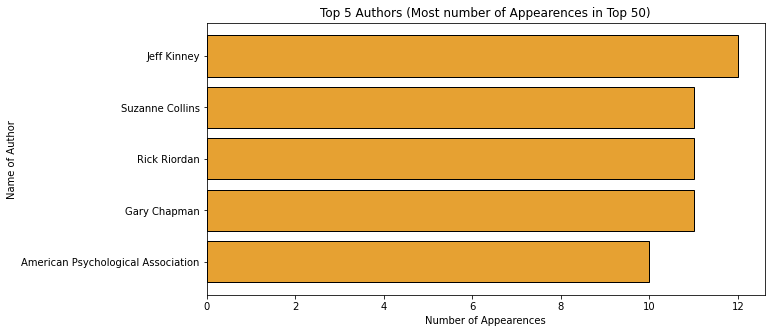

In [13]:
top_authors = dict(df['Author'].value_counts())
top_authors = list(top_authors.items())
top_authors = top_authors[0:5]
x,y = zip(*top_authors)
plt.figure(figsize=(10,5))
plt.barh(x,y,edgecolor='black',color=['#e6a132'])
plt.gca().invert_yaxis()
plt.xlabel('Number of Appearences')
plt.ylabel('Name of Author')
plt.title("Top 5 Authors (Most number of Appearences in Top 50)")

### Top 3 Authors with the most number of highest rated books without duplicates

Text(0.5, 1.0, 'Top 3 Authors with highest rated books (Without Duplicates)')

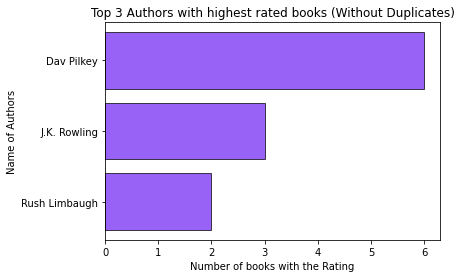

In [14]:
max_rating = df_without_duplicates['User Rating'].max()
highest_rating = df_without_duplicates[df_without_duplicates['User Rating']==max_rating]
highest_rating_author = dict(highest_rating['Author'].value_counts())
highest_rating_author = list(highest_rating_author.items())
highest_rating_author = highest_rating_author[:3]
x,y=zip(*highest_rating_author)
plt.barh(x,y,edgecolor='black',color='#6c1ff3',alpha=0.7)
plt.gca().invert_yaxis()
plt.xlabel('Number of books with the Rating')
plt.ylabel('Name of Authors')
plt.title('Top 3 Authors with highest rated books (Without Duplicates)')

### Book with the most Reviews is printed below along with it's other attributes

In [15]:
max_reviews = df_without_duplicates['Reviews'].max()
highest_reviews = df_without_duplicates[df_without_duplicates['Reviews']==max_reviews]
highest_reviews

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,0


### Average Values of Reviews,Price and User Rating for the period of 2009-2019 :

In [16]:
avg_review = df_without_duplicates['Reviews'].sum()/ 351
avg_price = df_without_duplicates['Price'].sum()/ 351
avg_userrating = df_without_duplicates['User Rating'].sum()/351
print('Average Number of Reviews is '+str(round(avg_review,2)))
print('Average Price is '+str(round(avg_price,2)))
print('Average User Rating is '+str(round(avg_userrating,2)))

Average Number of Reviews is 9799.68
Average Price is 13.08
Average User Rating is 4.61


### Following Bar chart shows the Average Reviews for each Year
- `2014 and 2019 have the highest avg review indicating the bestsellers in those years have high ratings than other years.`
- `2009,2010,2011 had the lowest avg compared to other years which maybe due to less reviewing done at that time.`

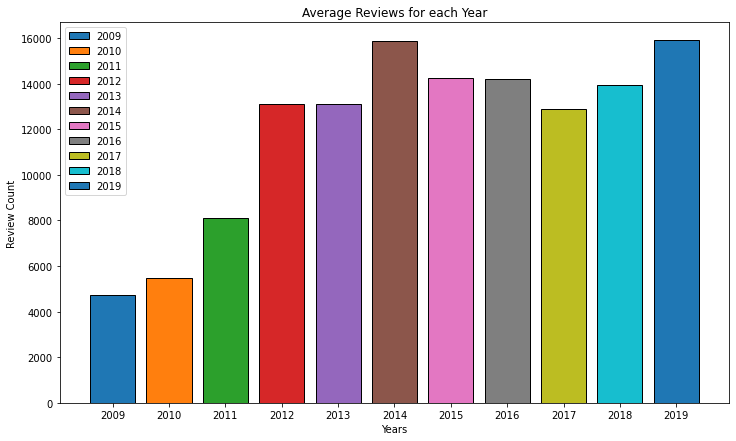

In [17]:
years = [df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019]
avg_review = []
avg_price = []
avg_user_rating = []
for year in years:
    avg_review.append(year['Reviews'].sum()/ 50)
    avg_price.append(year['Price'].sum()/ 50)
    avg_user_rating.append(year['User Rating'].sum()/50)

year_list = np.arange(2009,2020,1)
plt.figure(figsize=(12,7))
for i in range(0,11):
    plt.bar(year_list[i],avg_review[i],edgecolor='black',label=str(year_list[i]))
    plt.xticks(year_list)
    plt.yticks(np.arange(0,18000,2000))
    plt.xlabel('Years')
    plt.ylabel('Review Count')
    plt.title('Average Reviews for each Year')
    plt.legend()

### Following Bar chart shows the Average Price for each Year
- `We can see a downward trend in the last 4 years which means the bestsellers became cheap during that period.`
- `2015 had the lowest Avg Price out of all the years which also marked the beginning of the downward trend.`

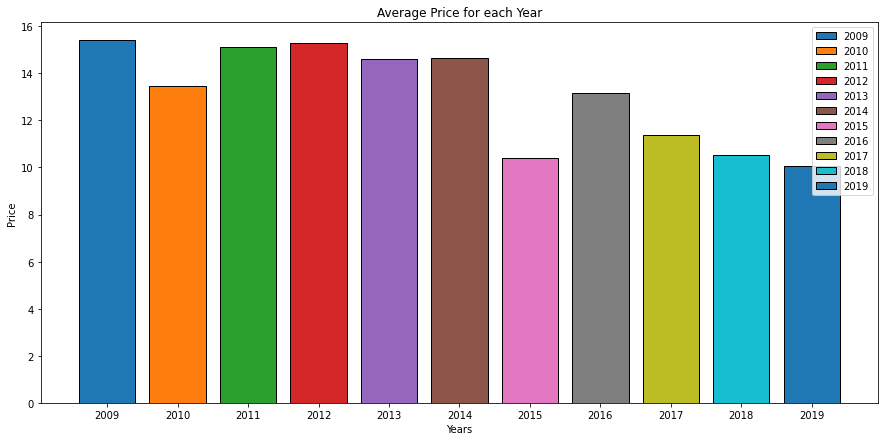

In [18]:
plt.figure(figsize=(15,7))
for i in range(0,11):
    plt.bar(year_list[i],avg_price[i],edgecolor='black',label=str(year_list[i]))
    plt.xticks(year_list)
    plt.xlabel('Years')
    plt.ylabel('Price')
    plt.title('Average Price for each Year')
    plt.legend()

### The following graph shows the difference between the Overall Avg User Rating and the Rating for each particular year
- `From 2014 the Avg User Rating was lower than the overall Avg User Rating.`

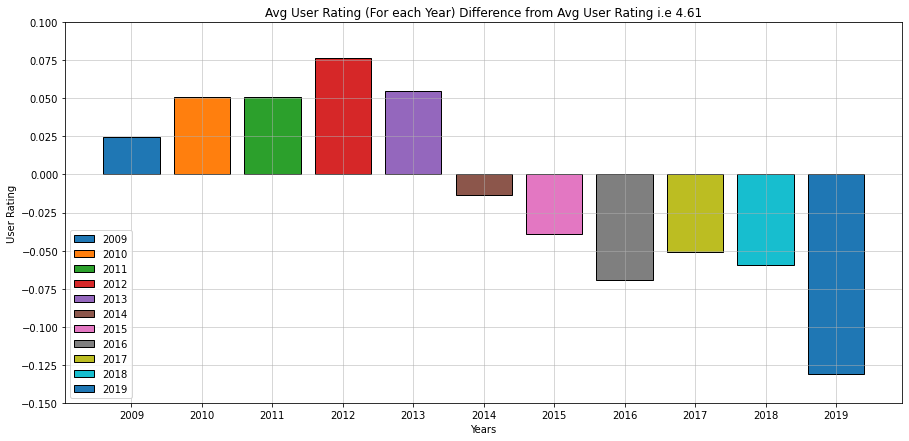

In [19]:
plt.figure(figsize=(15,7))
for i in range(0,11):
    plt.bar(year_list[i],avg_userrating-avg_user_rating[i],edgecolor='black',label=str(year_list[i]))
    plt.xticks(year_list)
    plt.yticks(np.arange(-0.15,0.11,0.025))
    plt.xlabel('Years')
    plt.ylabel('User Rating')
    plt.title('Avg User Rating (For each Year) Difference from Avg User Rating i.e 4.61')
    plt.grid(linewidth=0.5)
    plt.legend()

# The End
`If you liked the notebook then don't forget to upvote and suggestions are always welcomed.`
`Follow me on Linkedin :` __[Atharva_Dumbre](https://www.linkedin.com/in/atharva-dumbre-208b5716b)__